In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({
    "text.usetex":True,
    "font.size":18,
    "font.family": "serif"
})
colors = ["tab:blue", "tab:green", "tab:orange", 
          "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive"]

ModuleNotFoundError: No module named 'scipy'

In [ ]:
df_SGDeps =  pd.read_csv('dftemp_eps.csv')
df_grid =  pd.read_csv('dftemp1_grid_eps.csv')
df_SGDR =  pd.read_csv('dftemp2_reshape.csv')

NameError: name 'pd' is not defined

In [ ]:
m = 30
N = 300
Num_left = N - int(N/5)
K_nums = np.append([1,2,3,4,5],np.append(np.arange(20, int(Num_left/2)+1,50), Num_left))
eps_nums = np.logspace(-2,2)
step = 30

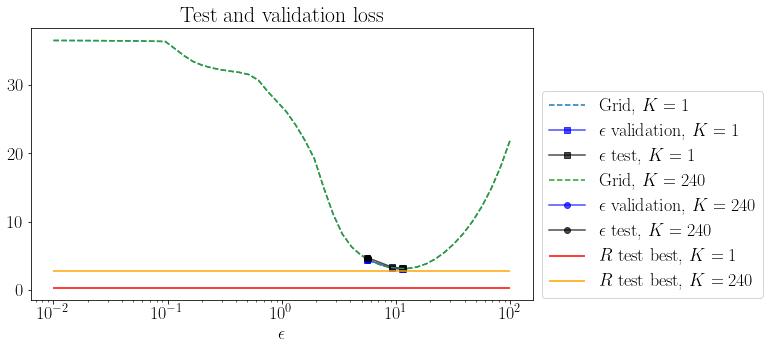

In [ ]:
plt.figure(figsize=(9, 5))
styles = ["s",'o',"^","v","<",">","o",'s',"^","v","<",">"]
j = 0
for K_count in [0,len(K_nums)-1]:
    #plt.plot(df_grid.sort_values(["K","Epsilon"])[K_count*len(eps_nums):(K_count+1)*len(eps_nums)]["Epsilon"], df_grid.sort_values(["K","Epsilon"])[K_count*len(eps_nums):(K_count+1)*len(eps_nums)]["Opt_val"], color = colors[j], linestyle='-', marker=styles[j], label="Grid, $K = {}$".format(K_nums[K_count]),alpha = 0.7)
    plt.plot(df_grid.sort_values(["K","Epsilon"])[K_count*len(eps_nums):(K_count+1)*len(eps_nums)]["Epsilon"], df_grid.sort_values(["K","Epsilon"])[K_count*len(eps_nums):(K_count+1)*len(eps_nums)]["Eval_val"], color = colors[j], linestyle='--',label="Grid, $K = {}$".format(K_nums[K_count]))
    plt.plot(df_SGDeps.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["Epsilon"][0:step:8],df_SGDeps.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["Loss_val"][0:step:8], linestyle='-', marker=styles[j], color = "blue", label="$\epsilon$ validation, $K = {}$".format(K_nums[K_count]),alpha = 0.7)
    plt.plot(df_SGDeps.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["Epsilon"][0:step:8], df_SGDeps.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["Eval_val"][0:step:8], linestyle='-', marker=styles[j], color = "black", label="$\epsilon$ test, $K = {}$".format(K_nums[K_count]),alpha = 0.7)
    j+=1
plt.hlines( xmin = 1e-2, xmax = 10**(2), y = np.min(df_SGDR[df_SGDR["K"]==1]["Eval_val"]), label = "$R$ test best, $K = 1$", color= "red")
plt.hlines( xmin = 1e-2, xmax = 10**(2), y = np.min(df_SGDR[df_SGDR["K"]==240]["Eval_val"]), label = "$R$ test best, $K = 240$", color= "orange")
    
plt.xlabel("$\epsilon$")
plt.title("Test and validation loss")
plt.xscale("log")
#plt.xlim([10**(-1),10**0.5])
#plt.ylim([-0.5,0])
plt.legend(bbox_to_anchor=(1, 0.8))

plt.show()

In [ ]:
plt.savefig("loss_compare.pdf")

<Figure size 432x288 with 0 Axes>

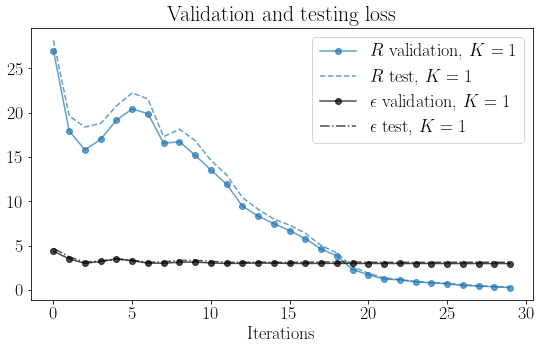

In [ ]:
plt.figure(figsize=(9, 5))
styles = ["o",'s',"^","v","<",">","o",'s',"^","v","<",">"]
j = 0
for K_count in [0]:
    plt.plot(df_SGDR.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["steps"], df_SGDR.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["Loss_val"], color = colors[j], linestyle='-', marker=styles[j], label="$R$ validation, $K = {}$".format(K_nums[K_count]),alpha = 0.7)
    plt.plot(df_SGDR.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["steps"], df_SGDR.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["Eval_val"],  color = colors[j], linestyle='--',alpha = 0.7,label="$R$ test, $K = {}$".format(K_nums[K_count]))
    plt.plot(df_SGDeps.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["steps"], df_SGDeps.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["Loss_val"],  label="$\epsilon$ validation, $K = {}$".format(K_nums[K_count]), color = "black",linestyle='-', marker=styles[j],alpha = 0.7)   
    plt.plot(df_SGDeps.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["steps"], df_SGDeps.sort_values(["K","steps"])[K_count*step:(K_count+1)*step]["Eval_val"], color = "black",linestyle='-.',alpha = 0.7,label="$\epsilon$ test, $K = {}$".format(K_nums[K_count]))
    j+=1
plt.xlabel("Iterations")
plt.title("Validation and testing loss")
plt.legend()
plt.savefig("loss_over_iters.pdf")
plt.show()


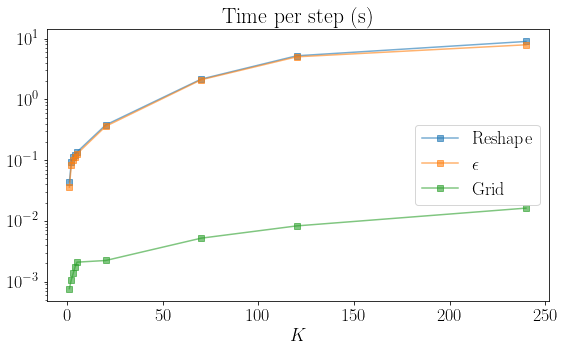

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(K_nums, df_SGDR.groupby(["K"]).sum()["solvetime"]/df_SGDR.groupby(["K"]).count()["solvetime"], linestyle='-', marker=styles[j], label="Reshape",alpha = 0.6)
plt.plot(K_nums, df_SGDeps.groupby(["K"]).sum()["solvetime"]/df_SGDeps.groupby(["K"]).count()["solvetime"], linestyle='-', marker=styles[j], label="$\epsilon$",alpha = 0.6)
plt.plot(K_nums, df_grid.groupby(["K"]).sum()["solvetime"]/df_grid.groupby(["K"]).count()["solvetime"], linestyle='-', marker=styles[j], label="Grid",alpha = 0.6)
plt.xlabel("$K$")
plt.title("Time per step (s)")
plt.yscale("log")
plt.legend()
plt.show()
plt.savefig("time_per_step.pdf")